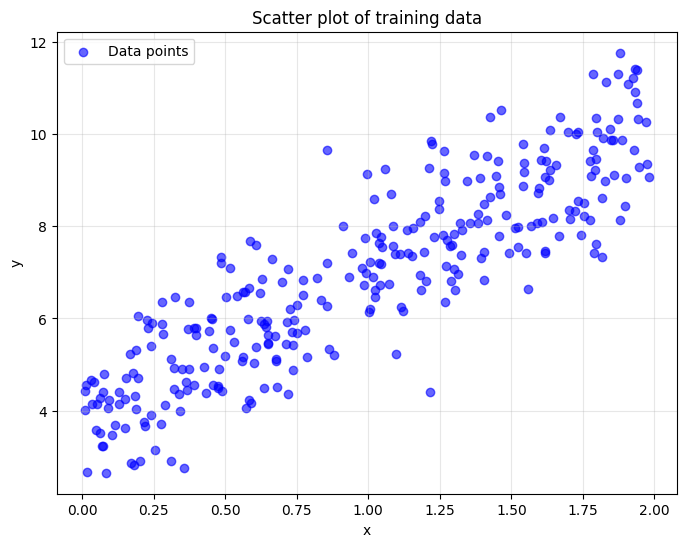

Running Gradient Descent...
Iteration    0: Cost = 25.2714, w = 0.0797, b = 0.0696
Iteration  100: Cost = 0.8430, w = 3.2271, b = 2.9173
Iteration  200: Cost = 0.5245, w = 3.5146, b = 3.3118
Iteration  300: Cost = 0.5111, w = 3.4918, b = 3.4206
Iteration  400: Cost = 0.5041, w = 3.4424, b = 3.4880
Iteration  500: Cost = 0.4991, w = 3.3969, b = 3.5426
Iteration  600: Cost = 0.4954, w = 3.3578, b = 3.5889
Iteration  700: Cost = 0.4927, w = 3.3244, b = 3.6282
Iteration  800: Cost = 0.4908, w = 3.2959, b = 3.6618
Iteration  900: Cost = 0.4894, w = 3.2716, b = 3.6904
Iteration 1000: Cost = 0.4884, w = 3.2509, b = 3.7148
Iteration 1100: Cost = 0.4876, w = 3.2332, b = 3.7356
Iteration 1200: Cost = 0.4871, w = 3.2182, b = 3.7534
Iteration 1300: Cost = 0.4867, w = 3.2053, b = 3.7685
Iteration 1400: Cost = 0.4864, w = 3.1944, b = 3.7814
Iteration 1500: Cost = 0.4862, w = 3.1851, b = 3.7924
Iteration 1600: Cost = 0.4860, w = 3.1771, b = 3.8017
Iteration 1700: Cost = 0.4859, w = 3.1703, b = 3.8097

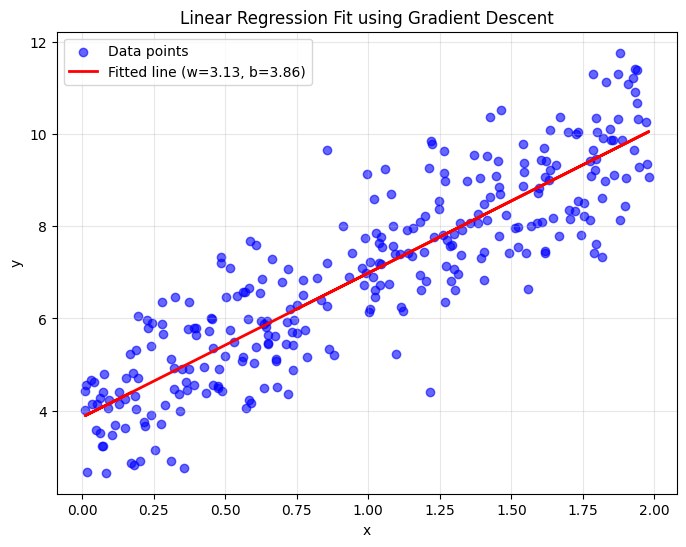

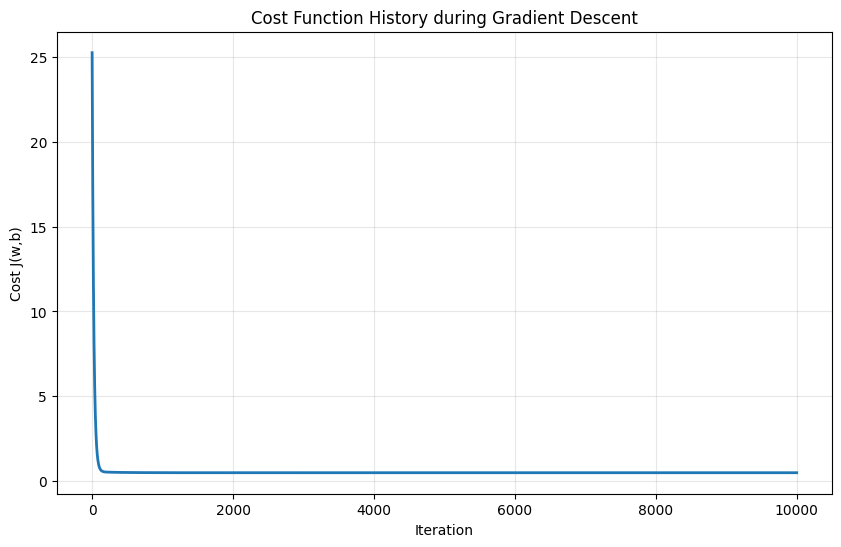


Normal Equation solution: w = 3.1311, b = 3.8559


In [ ]:
import numpy as np

# Linear Regression using Gradient Descent and Least Squares Method

import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
m = 300
x_train = 2 * np.random.rand(m, 1)
y_train = 4 + 3 * x_train + np.random.randn(m, 1)

# 1.a) Visualize the data to confirm linear regression is appropriate
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", alpha=0.6, label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of training data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 1.b) Linear regression prediction function
def linear_regression(X, w, b):
    """Compute predictions using linear regression"""
    return X.dot(w) + b

# Cost function (Mean Squared Error)
def compute_cost(X, y, w, b):
    """Compute the cost function J(w,b)"""
    m = X.shape[0]
    y_pred = linear_regression(X, w, b)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# Gradient computation
def compute_gradient(X, y, w, b):
    """Compute gradients for w and b"""
    m = X.shape[0]
    y_pred = linear_regression(X, w, b)
    error = y_pred - y
    dj_dw = (1 / m) * X.T.dot(error)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

# Gradient Descent Algorithm
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    """Perform gradient descent to learn w and b"""
    J_history = []
    w = w_init.copy()
    b = b_init
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost = {cost:.4f}, w = {w.flatten()[0]:.4f}, b = {b:.4f}")
    
    return w, b, J_history

# Initialize parameters and hyperparameters
w_init = np.zeros((x_train.shape[1], 1))
b_init = 0.0
alpha = 0.01  # Reduced learning rate for better convergence
num_iters = 3000  # Increased iterations for better convergence

# Run gradient descent
print("Running Gradient Descent...")
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters)
print(f"\nFinal parameters: w = {w_final.flatten()[0]:.4f}, b = {b_final:.4f}")

# Visualize the fitted line
y_pred_final = linear_regression(x_train, w_final, b_final)
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color="blue", alpha=0.6, label="Data points")
plt.plot(x_train, y_pred_final, color="red", linewidth=2, label=f"Fitted line (w={w_final.flatten()[0]:.2f}, b={b_final:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit using Gradient Descent")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot cost function history
plt.figure(figsize=(10, 6))
plt.plot(J_hist, linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Cost Function History during Gradient Descent")
plt.grid(True, alpha=0.3)
plt.show()

# Compare with Normal Equation (Closed-form solution)
X_b = np.c_[np.ones((m, 1)), x_train]  # Add bias column
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print(f"\nNormal Equation solution: w = {theta_best[1][0]:.4f}, b = {theta_best[0][0]:.4f}")